1) Loan Default Prediction — Logistic Regression (Binary)

Dataset: (loan_default.csv)

Columns: loan_amount, annual_income, credit_score, num_dependents, employment_years, defaulted

Scenario Task:
A bank wants to predict whether a customer will default
Scale numeric features.
Fit Logistic Regression to predict defaulted.
Report: Accuracy, Precision, Recall, F1, ROC-AUC
Identify which feature most increases default probability.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/varsh/Downloads/loan_default.csv")

Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5175


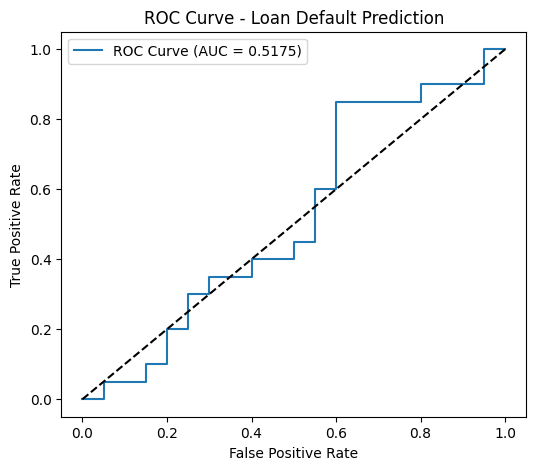


Feature Impact on Default Probability:
            Feature   Coefficient             Impact
4  employment_years  1.742895e-03  Increases Default
2      credit_score  3.651810e-04  Increases Default
1     annual_income  8.092916e-07  Increases Default
0       loan_amount -6.034456e-06  Decreases Default
3    num_dependents -4.487837e-02  Decreases Default


In [16]:
X=df[['loan_amount', 'annual_income', 'credit_score', 'num_dependents', 'employment_years']]
y=df['defaulted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lreg=LogisticRegression()
lreg.fit(X_train,y_train)

y_pred=lreg.predict(X_test_scaled)
y_prob=lreg.predict_proba(X_test_scaled)[:,1] 

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_prob)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1],'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Loan Default Prediction')
plt.legend()
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lreg.coef_[0]
})
coefficients['Impact'] = np.where(coefficients['Coefficient']>0, 'Increases Default', 'Decreases Default')
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("\nFeature Impact on Default Probability:")
print(coefficients)